In [1]:
import helpf as hf
import sys
from sklearn.preprocessing import Imputer
from scipy.stats import linregress
from sklearn.preprocessing import PolynomialFeatures
import scipy as sp
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
plt.style.use('seaborn')

In [2]:
#after obtaining the data and saving it locally we can take a look at it
df = pd.read_csv(
    "/Users/flatironschool/Documents/flatiron/Mod4_project/Data/planets_stars.csv",
    error_bad_lines=False)
df.isna().sum()  

pl_hostname         0
pl_discmethod       0
pl_pnum             0
pl_orbper         118
pl_orbsmax       1680
pl_orbeccen      2679
pl_bmassj        2448
pl_radj           946
st_teff           232
st_mass           766
st_rad            359
pl_trandur       1572
pl_ratdor        3239
dtype: int64

In [6]:
#create a new dataframe 'star-planet-df' and check how many NaNs in each column do we have 
spdf = df[['pl_orbper', 'pl_orbeccen', 'pl_bmassj', 'pl_radj', 'st_optmag', 'st_mass', 'st_teff', 'st_rad', 'pl_pnum']]
spdf.isna().sum()

pl_orbper       118
pl_orbeccen    2679
pl_bmassj      2448
pl_radj         946
st_optmag       200
st_mass         766
st_teff         232
st_rad          359
pl_pnum           0
dtype: int64

In [3]:
# getting rid of NaN's in stellar columns, pl_orbsmax and pl_trandur
new_df = df[np.isfinite(df["pl_trandur"])]
new_df = new_df[np.isfinite(new_df["pl_orbsmax"])]
new_df = new_df[np.isfinite(new_df["st_mass"])]
new_df = new_df[np.isfinite(new_df["st_rad"])]
new_df = new_df[np.isfinite(new_df["st_teff"])]
new_df.shape

(514, 13)

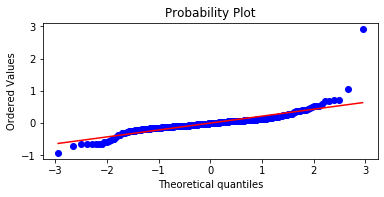

In [8]:
#temperature/mass
hf.qqplot('st_teff','st_mass', spdf_full_log) 

In [4]:
# data frame with only planet distance from star "pl_orbsmax" and planets
# transit duration
X = new_df[["pl_trandur", "pl_orbsmax"]]

# changing units to metric system.
Y = new_df['st_mass'].apply(lambda x: x*1.989e+30)
X['pl_trandur_metric'] = X['pl_trandur'].apply(lambda x: x*8.64e+4)
X['pl_orbsmax_metric'] = X['pl_orbsmax'].apply(lambda x: x*1.496e+8)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
X.columns
cols = ['pl_trandur_metric', 'pl_orbsmax_metric']

# adding log transformatin columns to the dataframe.
hf.columns_log(cols, X)
X.columns


X_log = X[['log_pl_trandur_metric', 'log_pl_orbsmax_metric']]
Y_log = np.log(Y)
Y
X_cons = sm.add_constant(X_log)

/Users/flatironschool/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
model_metric = sm.OLS(Y_log, X_log).fit()
model_metric.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                st_mass   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.028e+05
Date:                Fri, 17 Jan 2020   Prob (F-statistic):                        0.00
Time:                        09:50:08   Log-Likelihood:                         -1369.1
No. Observations:                 514   AIC:                                      2742.
Df Residuals:                     512   BIC:                                      2751.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
log_pl_trandur_metric     2.4902      0.415      5.995      0.000       1.674       3.306
log_pl_orbsmax_metric     2.8807      0.241     11.978      0.000       2.408       3.353
==============================================================================
Omnibus:                      143.737   Durbin-Watson:                   1.260
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.107
Skew:                          -1.287   Prob(JB):                    3.04e-103
Kurtosis:                       6.927   Cond. No.                         58.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model_metric = sm.OLS(Y_log, X_cons).fit()
model_metric.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                st_mass   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     201.0
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           4.01e-65
Time:                        09:50:33   Log-Likelihood:                -179.11
No. Observations:                 514   AIC:                             364.2
Df Residuals:                     511   BIC:                             376.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    67.6347      0.297    227.780      0.000      67.051      68.218
log_pl_trandur_metric     0.8239      0.042     19.755      0.000       0.742       0.906
log_pl_orbsmax_metric    -0.3507      0.028    -12.666      0.000      -0.405      -0.296
==============================================================================
Omnibus:                      215.643   Durbin-Watson:                   1.095
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1555.686
Skew:                          -1.666   Prob(JB):                         0.00
Kurtosis:                      10.845   Cond. No.                         365.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""